# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import python libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import regular expression
import re

# download necessary NLTK data
import nltk
nltk.download(['punkt', 'wordnet', 'stopwords', 'averaged_perceptron_tagger'])

# import tokenize, Lemmatizer, stopwords, stemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# import scikit-learn liberaries 
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, fbeta_score, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD

import warnings

warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
# load data from database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///DisasterResponseMessage.db')
df = pd.read_sql("SELECT * FROM DisasterResponseMessage", engine)

# assign X and Y values
X = df['message']
Y = df.drop(['id', 'message', 'original', 'genre'], axis = 1)

# return category_names
category_names = list(df.columns[4:])

In [3]:
Y.keys()

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [4]:
# display the first 5 rows of the table
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Write a tokenization function to process your text data

In [5]:
# define a text function to tokenize, lemmatize, and stopwords
def tokenize(text):

    # Normalize
    text = re.sub(r"[^a-zA-Z0-9]", ' ', text.lower())
    
    # Tokenize all the words in text 
    tokens = word_tokenize(text)
    
    # Initiate Lemmatization and Lemmatize the text
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:      
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    
    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [6]:
# create a pipeline model
pipeline = Pipeline([
                    ('vect', CountVectorizer(tokenizer=tokenize)),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [7]:
# Split data into train and tests sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# fit the train data within the pipeline
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

### Model testing for Y_test

In [8]:
# Predict Y_test using X_test with a model pipeline
Y_pred_test = pipeline.predict(X_test)

# Print classification report on test data (precision, recall, f1-score, support) for Y_test of category_names
category_names = list(df.columns[4:])
for i in range(len(category_names)):
    print("Category:", category_names[i],"\n", classification_report(Y_test.iloc[:, i].values, Y_pred_test[:, i]))
    print('Accuracy of %25s: %.2f' %(category_names[i], accuracy_score(Y_test.iloc[:, i].values, Y_pred_test[:,i])))

Category: related 
              precision    recall  f1-score   support

          0       0.64      0.34      0.45      1866
          1       0.82      0.94      0.87      5933
          2       0.44      0.31      0.36        55

avg / total       0.77      0.79      0.77      7854

Accuracy of                   related: 0.79
Category: request 
              precision    recall  f1-score   support

          0       0.89      0.98      0.93      6548
          1       0.81      0.38      0.52      1306

avg / total       0.87      0.88      0.86      7854

Accuracy of                   request: 0.88
Category: offer 
              precision    recall  f1-score   support

          0       0.99      1.00      1.00      7813
          1       0.00      0.00      0.00        41

avg / total       0.99      0.99      0.99      7854

Accuracy of                     offer: 0.99
Category: aid_related 
              precision    recall  f1-score   support

          0       0.73      0.87  

### Model testing for Y_train

In [9]:
# model test for Y_train prediction from X_train 
Y_pred_train = pipeline.predict(X_train)

# Print classification report on test data (precision, recall, f1-score, support) for Y_train of category_names
category_names = list(df.columns[4:])
for i in range(len(category_names)):
    print("Category:", category_names[i],"\n", classification_report(Y_train.iloc[:, i].values, Y_pred_train[:, i]))
    print('Accuracy of %25s: %.2f' %(category_names[i], accuracy_score(Y_train.iloc[:, i].values, Y_pred_train[:,i])))

Category: related 
              precision    recall  f1-score   support

          0       0.99      0.97      0.98      4250
          1       0.99      1.00      0.99     13943
          2       0.99      0.87      0.93       133

avg / total       0.99      0.99      0.99     18326

Accuracy of                   related: 0.99
Category: request 
              precision    recall  f1-score   support

          0       0.99      1.00      0.99     15168
          1       1.00      0.93      0.96      3158

avg / total       0.99      0.99      0.99     18326

Accuracy of                   request: 0.99
Category: offer 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     18249
          1       1.00      0.74      0.85        77

avg / total       1.00      1.00      1.00     18326

Accuracy of                     offer: 1.00
Category: aid_related 
              precision    recall  f1-score   support

          0       0.98      1.00  

### 6. Improve your model
Use grid search to find better parameters. 

In [10]:
#  check the parameters using the pipeline model
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x7f79d65d9950>, vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
               oob_score=False, random_state=None,

In [11]:
# Parameters and GridSearchCV 
parameters = {
    'clf__estimator__n_estimators': [6, 8, 10],
    'clf__estimator__min_samples_split': [2, 3, 4],
    }
clf = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, verbose=2)

In [13]:
# fit X_train and Y_train into classifier model 
clf.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6, total=  27.2s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   34.3s remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6, total=  27.2s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6, total=  27.4s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8, total=  33.6s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8, total=  33.3s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8, total=  33.5s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, total=  39.0s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10 
[CV]  clf__estimato

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 17.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__estimator__n_estimators': [6, 8, 10], 'clf__estimator__min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [14]:
# grid search evaluation for best performance metrics
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf__estimator__min_samples_split', 'param_clf__estimator__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [15]:
# calculate mean_test_score and std_test_score
for i in ['mean_test_score', 'std_test_score']:
        print(i," : ",clf.cv_results_[i])

mean_test_score  :  [ 0.22023355  0.21876023  0.22307105  0.20490014  0.21346721  0.21455855
  0.19867947  0.20642803  0.2131398 ]
std_test_score  :  [ 0.00193093  0.00423331  0.00571905  0.00403812  0.00106939  0.00263382
  0.00567337  0.00396073  0.00500703]


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [16]:
# Y_pred_test using the classifier model clf
Y_pred_test = clf.predict(X_test)

In [17]:
print('Test classification score: %.3f' % clf.score(X_test, Y_test))

Test classification score: 0.231


In [18]:
# Accuracy classification score and best parameter estimator
labels = np.unique(Y_pred_test)
accuracy = (Y_pred_test == Y_test).mean(axis=0)

print("Labels:", labels)
print("Accuracy:")
print(accuracy)
print("\nBest Parameters:", clf.best_params_)

Labels: [0 1 2]
Accuracy:
related                   0.791444
request                   0.882608
offer                     0.994780
aid_related               0.734021
medical_help              0.924879
medical_products          0.954673
search_and_rescue         0.975809
security                  0.983066
military                  0.968169
child_alone               1.000000
water                     0.951999
food                      0.917367
shelter                   0.925643
clothing                  0.985485
money                     0.977591
missing_people            0.990960
refugees                  0.970588
death                     0.959384
other_aid                 0.872167
infrastructure_related    0.934301
transport                 0.955691
buildings                 0.954291
electricity               0.981538
tools                     0.995671
hospitals                 0.987904
shops                     0.995416
aid_centers               0.988668
other_infrastructure      0.9

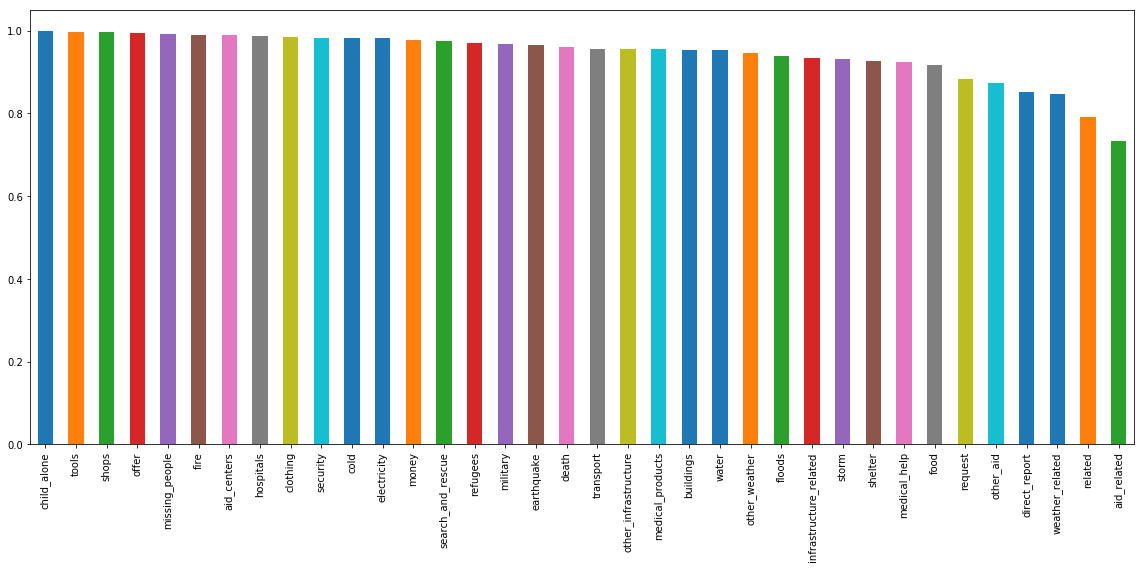

In [19]:
# barplot for accuracy classification score in rank from high to low
accuracy.sort_values(ascending=False, inplace=True)
accuracy.plot.bar(figsize=(16, 8))
plt.tight_layout()
plt.savefig('accuracy_classifier.png')

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [20]:
# create an improved pipeline with other features besides TF-IDF 
pipeline_new = Pipeline([
      ('features', FeatureUnion([

        ('text', Pipeline([
            ('vect', CountVectorizer(
                tokenizer=tokenize,
                stop_words=None)
            ),
            ('reduce_dim', TruncatedSVD()),
            ('tfidf', TfidfTransformer())
        ]))
    ], n_jobs = -1)),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

In [21]:
# create new parameter for the new pipeline
parameters_new = {
    'clf__estimator__n_estimators': [6, 8, 10],
    'clf__estimator__min_samples_split': [2, 3, 4],
}
clf_new = GridSearchCV(pipeline_new, param_grid=parameters_new, n_jobs=-1, verbose=2)

In [22]:
# fit X_train and Y_train in to new classifier model (clf) 
clf_new.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6, total=  20.5s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.5s remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6, total=  20.3s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=6, total=  20.5s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8, total=  24.4s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8, total=  24.2s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=8, total=  24.5s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, total=  28.1s
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10 
[CV]  clf__estimato

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 13.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=-1,
       transformer_list=[('text', Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, m...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__estimator__n_estimators': [6, 8, 10], 'clf__estimator__min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [23]:
# improved prediction with the new clf
Y_pred_test2 = clf_new.predict(X_test)

category_names = list(df.columns[4:])
for i in range(len(category_names)):
    print(category_names[i], (classification_report(Y_test.iloc[i], Y_pred_test2[i])))

related              precision    recall  f1-score   support

          0       0.65      0.96      0.77        23
          1       0.50      0.08      0.13        13

avg / total       0.59      0.64      0.54        36

request              precision    recall  f1-score   support

          0       0.84      0.96      0.90        28
          1       0.75      0.38      0.50         8

avg / total       0.82      0.83      0.81        36

offer              precision    recall  f1-score   support

          0       0.85      0.93      0.89        30
          1       0.33      0.17      0.22         6

avg / total       0.76      0.81      0.78        36

aid_related              precision    recall  f1-score   support

          0       0.94      0.97      0.96        33
          1       0.50      0.33      0.40         3

avg / total       0.90      0.92      0.91        36

medical_help              precision    recall  f1-score   support

          0       0.92      1.00      0

In [24]:
print('Test classification score: %.3f' % clf_new.score(X_test, Y_test))

Test classification score: 0.095


In [25]:
# New and improved accuracy classification score and best parametr estimator
labels = np.unique(Y_pred_test2)
accuracy = (Y_pred_test2 == Y_test).mean(axis=0)

print("Labels:", labels)
print("Accuracy:")
print(accuracy)
print("\nBest Parameters:", clf.best_params_)

Labels: [0 1 2]
Accuracy:
related                   0.639419
request                   0.754520
offer                     0.992233
aid_related               0.536542
medical_help              0.868220
medical_products          0.919404
search_and_rescue         0.953654
security                  0.969952
military                  0.943850
child_alone               1.000000
water                     0.898268
food                      0.822765
shelter                   0.858798
clothing                  0.975299
money                     0.960657
missing_people            0.982811
refugees                  0.948943
death                     0.924879
other_aid                 0.799338
infrastructure_related    0.893685
transport                 0.926662
buildings                 0.915966
electricity               0.969188
tools                     0.990833
hospitals                 0.978992
shops                     0.992870
aid_centers               0.978992
other_infrastructure      0.9

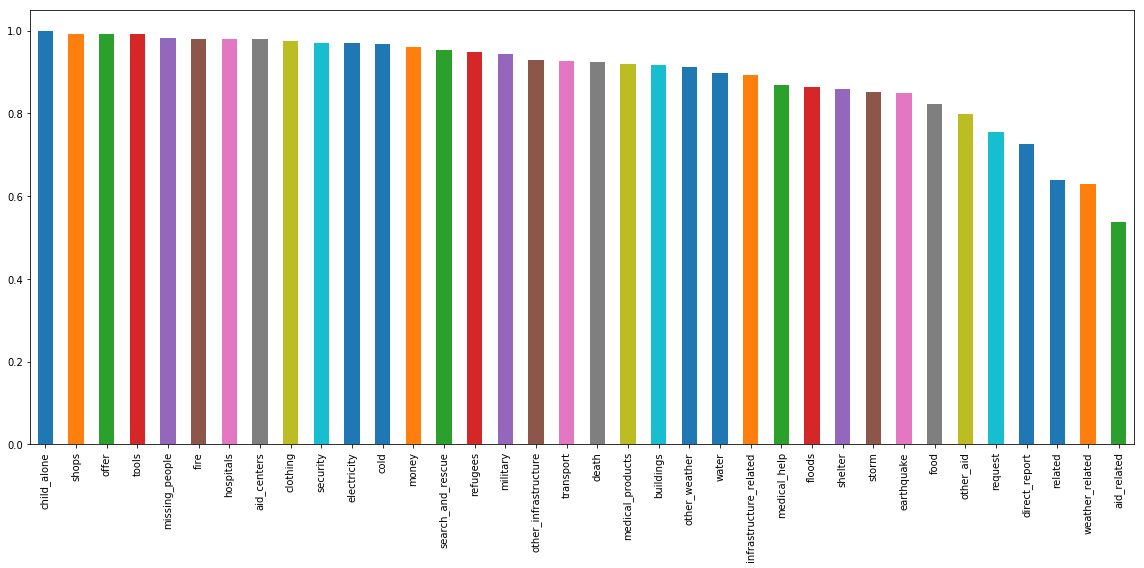

In [26]:
# barplot for accuracy classification score in rank from high to low
accuracy.sort_values(ascending=False, inplace=True)
accuracy.plot.bar(figsize=(16, 8))
plt.tight_layout()
plt.savefig('accuracy_classifier_improved_model.png')

### 9. Export your model as a pickle file

In [27]:
# Save the data into pickle file(.pkl) in the current directory
import joblib
import bz2

# # Open the pickle file to write in binary form
pkl_filename = "classifier.pkl"
with bz2.open(pkl_filename, 'wb') as file:
    joblib.dump(clf, file)

# Open the pickle file to read it in binary form
with bz2.open(pkl_filename, 'rb') as file:
    model = joblib.load(file)

# Calculate the accuracy score and predict target values
score = model.score(X_test, Y_test)
print("Test score: {0:.2f} %".format(100 * score))
Y_pred_test = model.predict(X_test)

Test score: 23.15 %


### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.